#TASK 1: Prediction using Supervised ML
##Problem Statement: Predict the percentage of a student based on the number of study hours.

Dataset: http://bit.ly/w-data

### Name : Kunwar Payal Gaurishankar

In [ ]:
import pandas as pd
import numpy as np  

In [ ]:
df = pd.read_csv("http://bit.ly/w-data") #importing data

In [ ]:
df.head(10) #displaying the first 10 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Data Visualization

In [ ]:
#importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

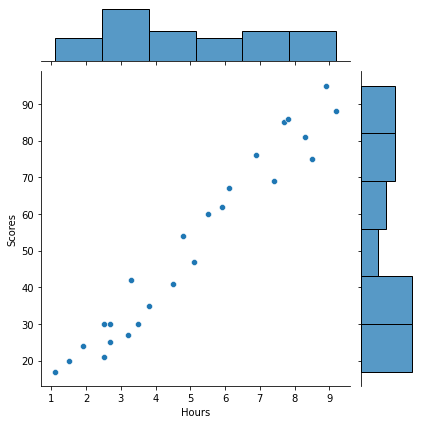

In [ ]:
sns.jointplot(x = df['Hours'], y = df['Scores'], kind = 'scatter')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

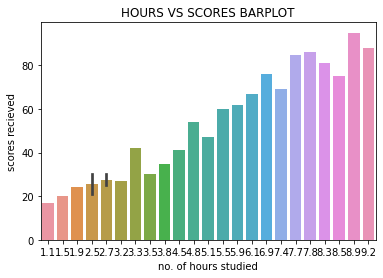

In [ ]:
sns.barplot(x = 'Hours',y = 'Scores',data = df)
plt.title('HOURS VS SCORES BARPLOT')
plt.xlabel('no. of hours studied')
plt.ylabel('scores recieved') 
plt.show()

Training and testing the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#dividing the variables into target and predictor variables
Y=df.Scores #Target Variable 
X=df.drop(['Scores'],axis=1) #predictor variable

In [ ]:
#dividing data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#from visualization, a linear model should be used for data prediction
lr = LinearRegression()  
lr.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)
#the intercept
print('Intercept: \n',lr.intercept_)

Coefficients: 
 [9.91065648]
Intercept: 
 2.018160041434662


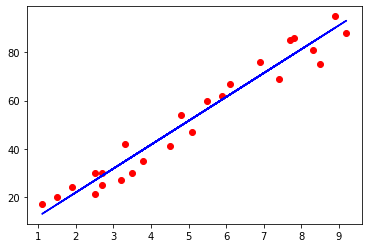

In [ ]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, Y, color='red')
plt.plot(X, line, color='blue');
plt.show()

In [ ]:
Y_pred = lr.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
dp = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
dp

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
#importing the libraries
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# The mean squared error linear
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 21.60
Variance score: 0.95


In [ ]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
